In [2]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from skimage.feature import match_template
from skimage.feature import peak_local_max

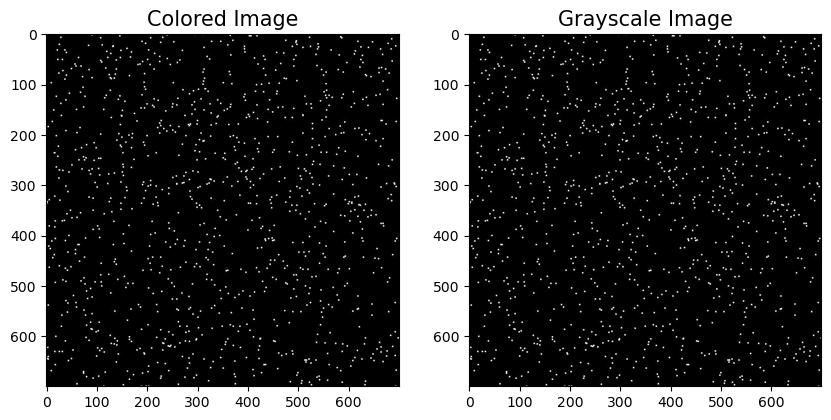

In [3]:
sample = imread('img.jpg')
sample_g = rgb2gray(sample)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

In [4]:
sample.shape

(700, 700, 3)

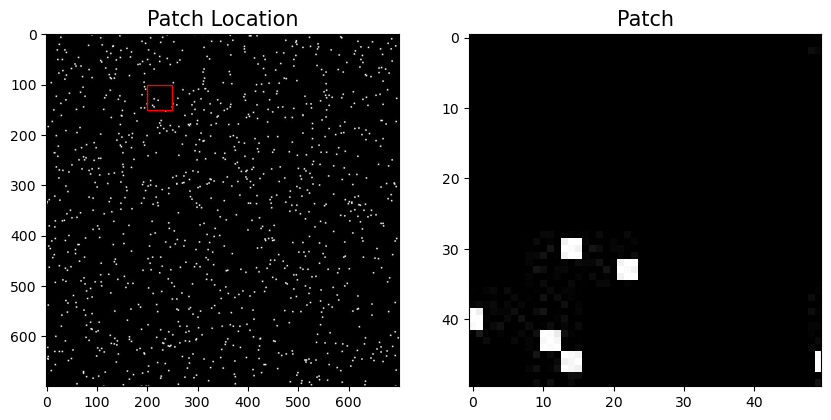

In [5]:
patch_size = (50,50)
image_res = (700, 700)
patch_loc = (100,200)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[0].add_patch(Rectangle(patch_loc[::-1], patch_size[0],patch_size[1], edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = sample_g[patch_loc[0]:patch_loc[0]+patch_size[0], patch_loc[1]:patch_loc[1]+patch_size[0]]
ax[1].imshow(patch,cmap='gray')
ax[1].set_title('Patch',fontsize=15)
plt.show()

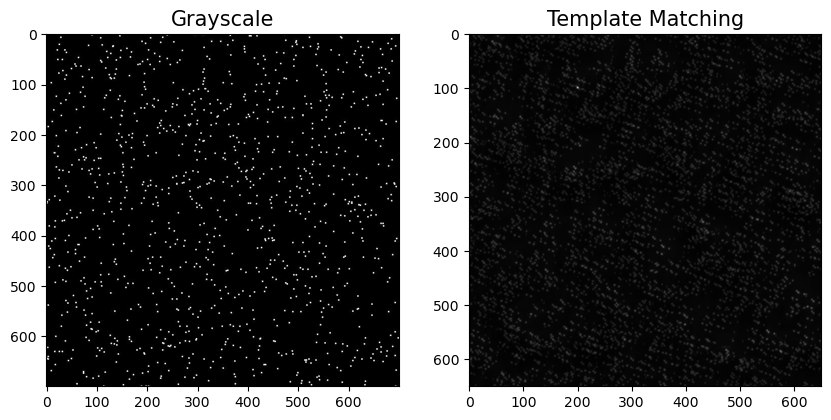

In [6]:
sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

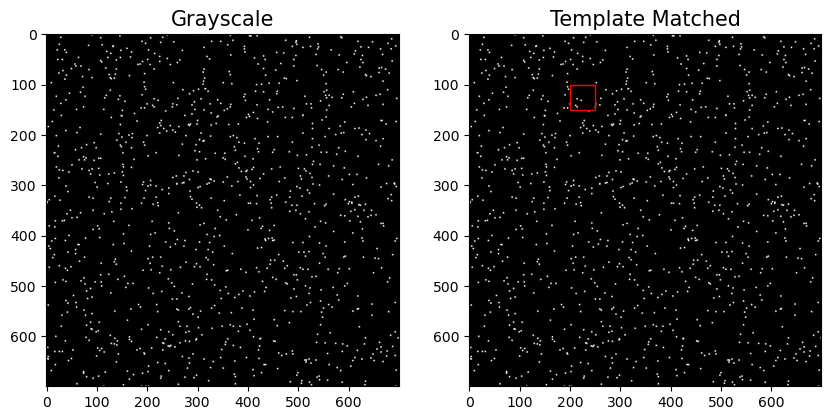

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_g,cmap='gray')
patch_width, patch_height = patch.shape
for x, y in peak_local_max(sample_mt, threshold_abs=0.6):
    rect = plt.Rectangle((y, x), patch_height, patch_width, color='r', 
                         fc='none')
    ax[1].add_patch(rect)
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matched',fontsize=15);